In [1]:
# Dependencies
import pandas as pd
from pathlib import Path

In [2]:
# Name of the CSV file
obesity_file = Path('Resources/500_Cities__Obesity_among_adults_aged___18_years_20231109.csv')
walk_file = Path('Resources/EPA_SmartLocationDatabase_V3_Jan_2021_Final (1).csv')
income_file = Path('Resources/kaggle_income.csv')

In [3]:
# The correct encoding must be used to read the CSV in pandas
obesity_df = pd.read_csv(obesity_file, encoding="ISO-8859-1")
walk_df = pd.read_csv(walk_file, encoding="ISO-8859-1")
income_df = pd.read_csv(income_file, encoding="ISO-8859-1")


In [57]:
#cleaning and grouping of income by city name

cleaned_income_df = income_df.drop(['id', 'Type', 'Primary', 
                                     'Area_Code','ALand','AWater',
                                     'Lat','Lon','sum_w'], axis=1)




#cleaned_income__grouped = cleaned_income_df.groupby('City')['Mean'].mean()
city_income_df = cleaned_income_df.groupby('City', as_index = False)['Mean'].mean()
#cleaned_income__grouped_df = pd.DataFrame(cleaned_income__grouped, index=['City', 'Average Income'])
city_income_df
#list(income_df)

,City,Mean
0,Abbeville,38459.428571
1,Abbotsford,58254.000000
2,Aberdeen,68306.500000
3,Abilene,51441.866667
4,Abingdon,85714.166667
...,...,...
8123,Zionsville,83345.000000
8124,Zolfo Springs,38331.000000
8125,Zumbrota,56065.000000
8126,Zuni,44114.000000


In [5]:
# Preview of the DataFrame
obesity_df.head()

,ï»¿Year,StateAbbr,StateDesc,CityName,GeographicLevel,DataSource,Category,UniqueID,Measure,Data_Value_Unit,...,High_Confidence_Limit,Data_Value_Footnote_Symbol,Data_Value_Footnote,PopulationCount,GeoLocation,CategoryID,MeasureId,CityFIPS,TractFIPS,Short_Question_Text
0,2017,CA,California,Hayward,City,BRFSS,Unhealthy Behaviors,633000,Obesity among adults aged >=18 Years,%,...,24.4,NaN,NaN,"144,186","(37.6329591551, -122.077051051)",UNHBEH,OBESITY,633000.0,NaN,Obesity
1,2017,CA,California,Lakewood,City,BRFSS,Unhealthy Behaviors,639892,Obesity among adults aged >=18 Years,%,...,22.2,NaN,NaN,"80,048","(33.8470531941, -118.122204765)",UNHBEH,OBESITY,639892.0,NaN,Obesity
2,2017,AL,Alabama,Huntsville,Census Tract,BRFSS,Unhealthy Behaviors,0137000-01089010612,Obesity among adults aged >=18 Years,%,...,31.5,NaN,NaN,"2,654","(34.7636374497, -86.7500225775)",UNHBEH,OBESITY,137000.0,1.089011e+09,Obesity
3,2017,AL,Alabama,Mobile,City,BRFSS,Unhealthy Behaviors,150000,Obesity among adults aged >=18 Years,%,...,38.3,NaN,NaN,"195,111","(30.6776248648, -88.1184482714)",UNHBEH,OBESITY,150000.0,NaN,Obesity
4,2017,AZ,Arizona,Avondale,Census Tract,BRFSS,Unhealthy Behaviors,0404720-04013082027,Obesity among adults aged >=18 Years,%,...,31.5,NaN,NaN,"3,978","(33.4505348518, -112.292540729)",UNHBEH,OBESITY,404720.0,4.013082e+09,Obesity


In [19]:
#cleaning obesity df to make more readable
cleaned_obesity_df = obesity_df.drop(['GeographicLevel', 'DataSource', 'Category', 
                                      'UniqueID','Measure','Data_Value_Unit',
                                      'DataValueTypeID','Data_Value_Type','Data_Value_Footnote_Symbol',
                                      'Data_Value_Footnote','CategoryID','MeasureId','Short_Question_Text'], axis=1)

cleaned_obesity_df

,ï»¿Year,StateAbbr,StateDesc,CityName,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,PopulationCount,GeoLocation,CityFIPS,TractFIPS
0,2017,CA,California,Hayward,24.2,24.1,24.4,"144,186","(37.6329591551, -122.077051051)",633000.0,NaN
1,2017,CA,California,Lakewood,22.1,21.9,22.2,"80,048","(33.8470531941, -118.122204765)",639892.0,NaN
2,2017,AL,Alabama,Huntsville,30.3,29.2,31.5,"2,654","(34.7636374497, -86.7500225775)",137000.0,1.089011e+09
3,2017,AL,Alabama,Mobile,38.2,38.0,38.3,"195,111","(30.6776248648, -88.1184482714)",150000.0,NaN
4,2017,AZ,Arizona,Avondale,30.6,29.6,31.5,"3,978","(33.4505348518, -112.292540729)",404720.0,4.013082e+09
...,...,...,...,...,...,...,...,...,...,...,...
29001,2017,WA,Washington,Vancouver,33.8,32.5,35.0,"5,941","(45.6216074971, -122.512559914)",5374060.0,5.301104e+10
29002,2017,WI,Wisconsin,Milwaukee,33.0,31.8,34.2,"1,667","(43.0232614948, -87.9135337878)",5553000.0,5.507919e+10
29003,2017,WA,Washington,Spokane,33.9,33.0,34.6,"4,654","(47.7077072768, -117.370950018)",5367000.0,5.306300e+10
29004,2017,WI,Wisconsin,Milwaukee,29.7,28.4,30.9,"1,920","(43.0789228818, -88.012427277)",5553000.0,5.507901e+10


In [58]:
#grouping by city to remove duplicate values (limitation on not doing it by zipcode)
city_obesity_df = cleaned_obesity_df.groupby('CityName', as_index = False)['Data_Value'].mean()
city_obesity_df.head()

,CityName,Data_Value
0,Abilene,33.838462
1,Akron,38.142647
2,Alameda,20.338889
3,Albany,35.403636
4,Albuquerque,26.787050


In [65]:
#inner merge of city income and city obesity average %
merged_df = pd.merge(city_obesity_df, city_income_df, left_on='CityName', right_on='City', how='inner')
merged_df = merged_df.drop('City', axis=1)
merged_df = merged_df.rename(columns={"CityName": "City", "Data_Value": "Obesity %", "Mean": 'Average Income'})
merged_df.head(100)


,City,Obesity %,Average Income
0,Abilene,33.838462,51441.866667
1,Akron,38.142647,53194.675000
2,Alameda,20.338889,89726.375000
3,Albany,35.403636,52808.971429
4,Albuquerque,26.787050,63773.389831
...,...,...,...
95,Coral Springs,24.489286,87020.181818
96,Corona,27.159459,73237.880000
97,Corpus Christi,34.622368,65552.000000
98,Costa Mesa,21.977778,109889.733333


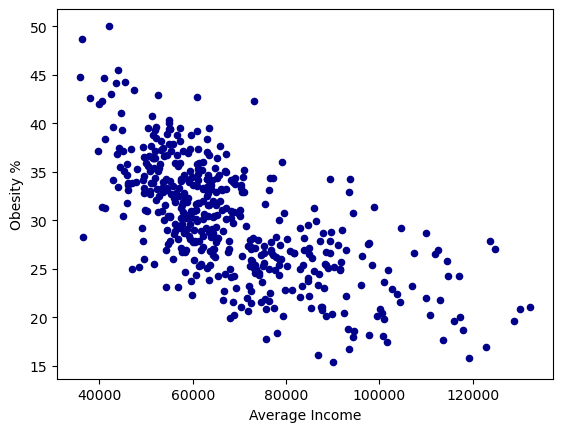

In [68]:
# Quick plot to look at all cities
ax1 = merged_df.plot.scatter(x='Average Income',
                      y='Obesity %',
                      c='DarkBlue')